# 数据挖掘流程

1.数据读取
- 读取数据
- 统计指标
- 数据规模

2.数据探索（特征理解）
- 单特征的分析，逐个变量分析对结果y的影响（X和Y之间的相关性）
- 多变量分析（X和X之间的相关性）
- 统计绘图

3.数据清洗和预处理
- 缺失值填充
- 特征的标准化、归一化
- 特征工程（筛选有价值的特征）
- 特征之间的相关性

4.建立模型
- 特征数据和标签的准备
- 数据集切分
- 多种模型对比：交叉验证，调参（学习曲线，网格搜索）
- 集成算法（提升算法） XGBoost,GBDT,light-GBM,神经网络（多种集成）


In [1]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\CDA\python\机器学习1\决策树\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

饼图，柱状图 #获取标签比例情况

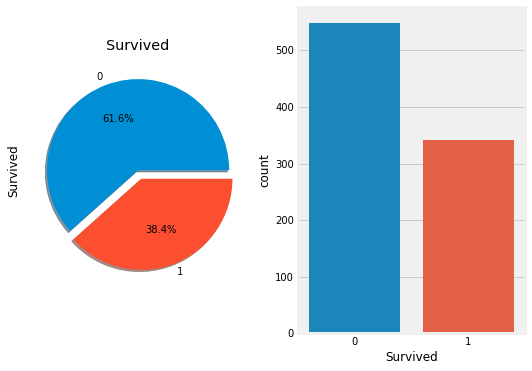

In [7]:
f,ax=plt.subplots(1,2,figsize=(8,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                        autopct='%1.1f%%',
                                        ax=ax[0],shadow=True)
ax[0].set_title('Survived')

sns.countplot('Survived',data=data,ax=ax[1])

In [8]:
#不同性别下的存货人数
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

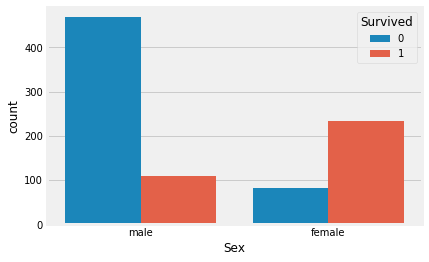

In [9]:
sns.countplot('Sex',hue='Survived',data=data)

In [10]:
#pclass和survived之间的关系
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


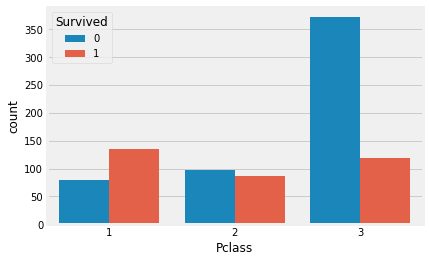

In [11]:
sns.countplot('Pclass',hue='Survived',data=data)

In [12]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

因子图:三维图压缩成二维图

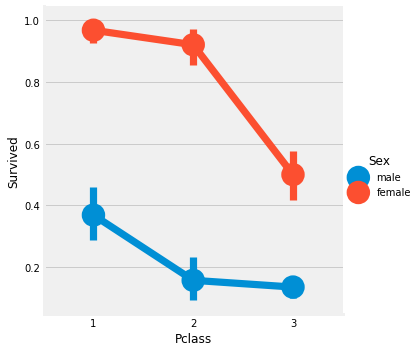

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

## 缺失值填充

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
data['initial']=data.Name.str.extract('([A-Za-z]+)\.')
data['initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: initial, dtype: object

In [16]:
pd.crosstab(data.initial,data.Sex).T

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
re=[]
for i in data.initial.values:
    if i!='Master' and i!='Miss' and i!='Mr' and i!='Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)

In [18]:
data['re']=re

In [19]:
set(data.re)#去重

{'Master', 'Miss', 'Mr', 'Mrs', 'other'}

In [20]:
data.re.unique()#去重

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [21]:
data.groupby('re')['Sex'].count()

re
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

In [22]:
data.groupby('re')['Age'].mean()

re
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [24]:
for i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re==i),'Age']=int(data.groupby('re')['Age'].mean()[i])

In [25]:
data.Age.isnull().sum()

0

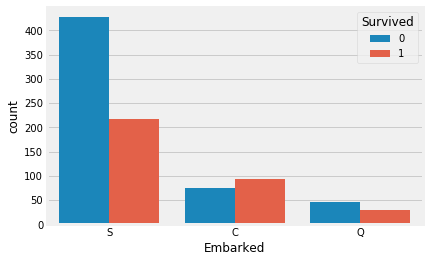

In [26]:
sns.countplot('Embarked',hue='Survived',data=data)

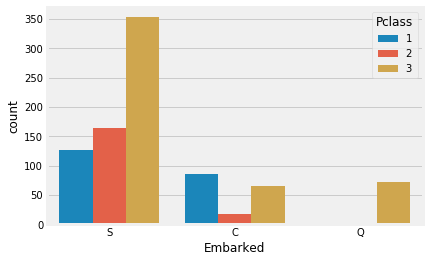

In [27]:
sns.countplot('Embarked',hue='Pclass',data=data)

In [28]:
data['Embarked'].fillna('S',inplace=True)

In [29]:
data['Embarked'].isnull().sum()

0

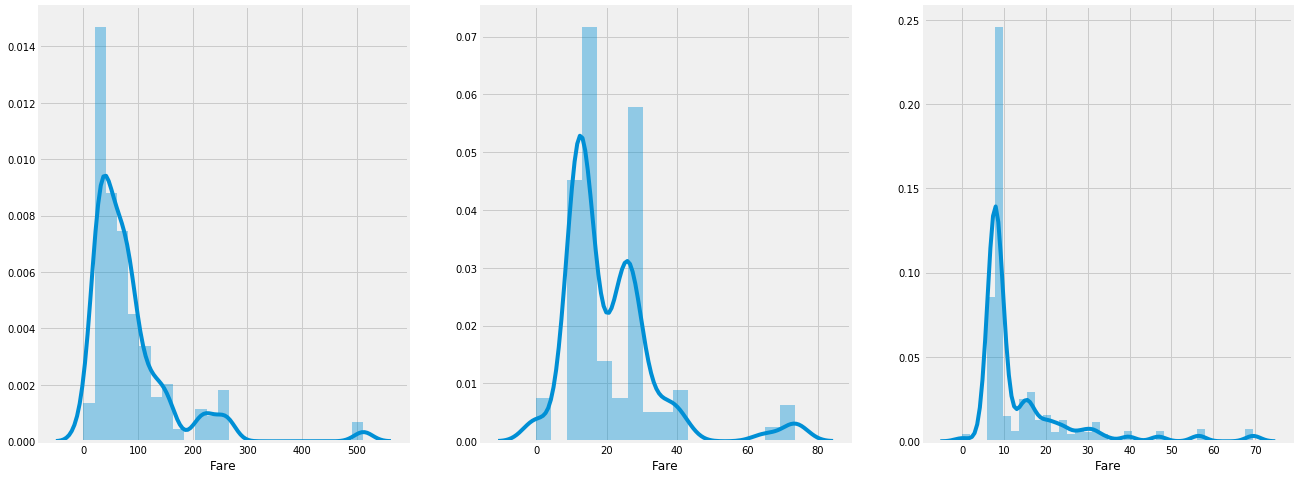

In [30]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])

皮尔逊相关系数

In [31]:
# 相关性热图
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043358,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.089369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.346011,0.083081,0.018443,-0.549500
Age,0.043358,-0.089369,-0.346011,1.000000,-0.268632,-0.195330,0.092215
SibSp,-0.057527,-0.035322,0.083081,-0.268632,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.195330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.092215,0.159651,0.216225,1.000000


相关性热图

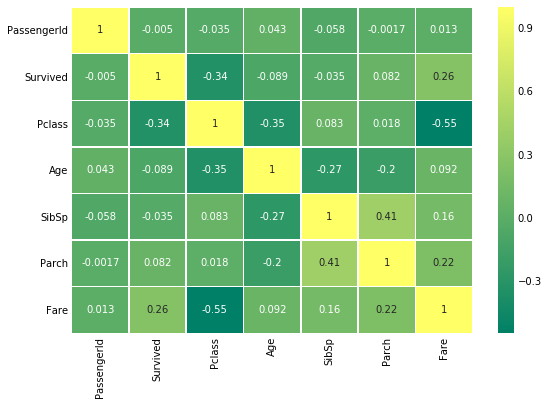

In [32]:
sns.heatmap(data.corr(),annot=True,linewidths=0.5,cmap='summer')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('heatmap.png')

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [34]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=65),'Age_band']=3
data.loc[data['Age']>65,'Age_band']=4

In [35]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Mr,1


In [36]:
from sklearn import preprocessing

数值化

In [37]:
lbl=preprocessing.LabelEncoder()#LabelEncoder标签编码
data['Sex']=lbl.fit_transform(data['Sex'])
data['Embarked']=lbl.fit_transform(data['Embarked'])
data['re']=lbl.fit_transform(data['re'])

In [38]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,2,Mr,2,1


In [39]:
data.Embarked.unique()

array([2, 0, 1], dtype=int64)

哑变量：数据存在多重共线性，onehot无法避免，哑变量可以

1.实例化

In [40]:
one_hot=preprocessing.OneHotEncoder(sparse=False)

In [41]:
data['Embarked']=one_hot.fit_transform(data[['Embarked']])

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Mr,2,2


In [43]:
data.drop(['PassengerId','Name','Age','Ticket','Cabin','initial'],axis=1,
         inplace=True)

# 建模

In [45]:
data.head(1)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.25,0.0,2,1


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [48]:
X=data.iloc[:,data.columns!='Survived']
y=data.iloc[:,data.columns=='Survived']

In [49]:
X.shape

(891, 8)

In [50]:
y.shape

(891, 1)

In [51]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
#逻辑回归
l=LogisticRegression()
l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

0.8100558659217877

In [53]:
pred_1=l.predict(Xtest)
metrics.accuracy_score(Ytest,pred_1)

0.8100558659217877

KNN调参

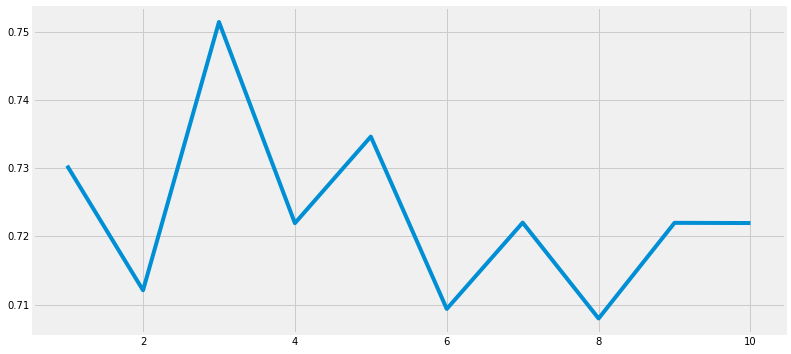

In [54]:
score=[]
for i in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=i)
    CVS=cross_val_score(KNN,Xtrain,Ytrain,cv=5)
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)
fig=plt.gcf()
fig.set_size_inches(12,6)

In [55]:
max(score)

0.7514527725795331

In [56]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)

0.7597765363128491

## 网格搜索

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
#输出接口
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [60]:
GR.best_score_

0.8286516853932584

In [61]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)

In [62]:
DTC.score(Xtest,Ytest)

0.8379888268156425

In [63]:
DTC.feature_importances_

array([0.16799063, 0.38566561, 0.07586498, 0.01259698, 0.27372801,
       0.01008347, 0.05592281, 0.0181475 ])

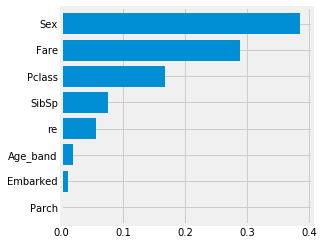

In [64]:
f = plt.figure(figsize=(4,4))
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)

pd.Series(DTC.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)

## ROC曲线

In [65]:
y_pred=DTC.predict(Xtest)

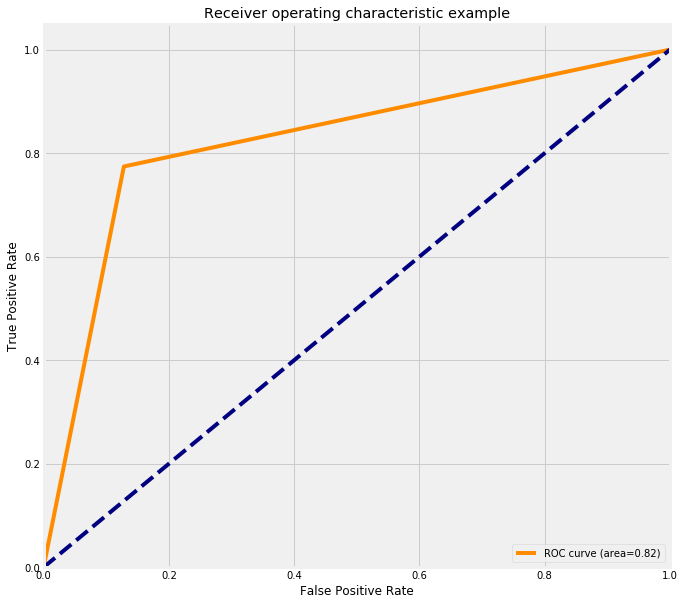

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve,auc#计算roc,auc
#计算真正率和假正率
fpr,tpr,threshold=roc_curve(Ytest,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area=%0.2f)'%roc_auc)#真正率纵坐标和假正率横坐标
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')

## 混淆矩阵

In [67]:
from sklearn.model_selection import cross_val_predict 

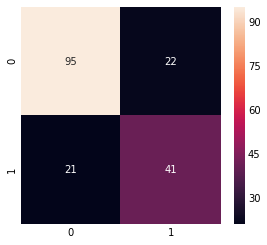

In [68]:
plt.figure(figsize=(4,4))
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
y_pred =KNN.predict(Xtest)
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

In [69]:
from sklearn.ensemble import BaggingClassifier#随机森林

In [70]:
model=BaggingClassifier(base_estimator=DTC,n_estimators=700,random_state=0)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.8659217877094972